In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


### Define, train, and evaluate a linear model

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7022 - accuracy: 0.8227
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3117 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2854 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2699 - accuracy: 0.9241
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2640 - accuracy: 0.9264


[0.2639727294445038, 0.9264000058174133]

In [17]:
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))

tf.Tensor(
[[ 964    0    2    2    0    4    5    2    1    0]
 [   0 1111    3    2    0    1    4    2   12    0]
 [   7    9  929   14    8    5   12   10   35    3]
 [   4    0   19  919    0   25    2   12   21    8]
 [   2    1    6    1  919    0    8    3   10   32]
 [  10    3    5   29   11  778   15    6   28    7]
 [  14    3    6    1    7   14  909    2    2    0]
 [   1    6   23    5    8    0    0  947    2   36]
 [   9    7    7   23    9   26    9   11  864    9]
 [  11    7    1   11   30    8    0   17    4  920]], shape=(10, 10), dtype=int32)


In [4]:
# A plotting function you can reuse
def plot(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7333 - accuracy: 0.8083 - val_loss: 0.3111 - val_accuracy: 0.9135
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3078 - accuracy: 0.9141 - val_loss: 0.2812 - val_accuracy: 0.9213
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2846 - accuracy: 0.9197 - val_loss: 0.2747 - val_accuracy: 0.9231
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2744 - accuracy: 0.9240 - val_loss: 0.2679 - val_accuracy: 0.9252
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2644 - accuracy: 0.9259 - val_loss: 0.2685 - val_accuracy: 0.9257
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2581 - accuracy: 0.9285 - val_loss: 0.2642 - val_accuracy: 0.9277
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2620 - accuracy: 0.9277 - val_loss: 0.2665 - val_ac

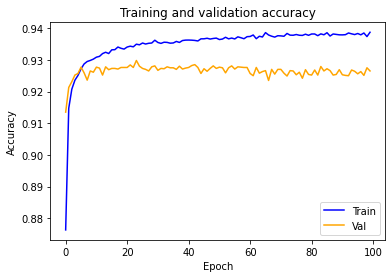

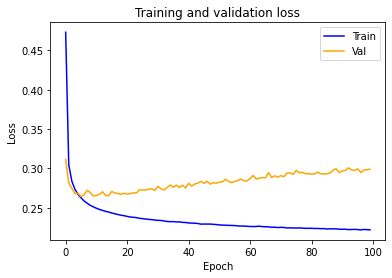

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))


### 1b: Implement a neural network 


Modify the code below to create a neural network (with a single hidden layer). Add a Dense layer with 128 units and ReLU activation. 

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4333 - accuracy: 0.8795 - val_loss: 0.1317 - val_accuracy: 0.9620
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1198 - accuracy: 0.9657 - val_loss: 0.1112 - val_accuracy: 0.9654
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0796

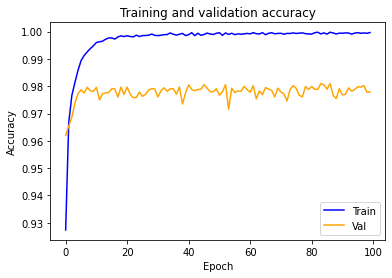

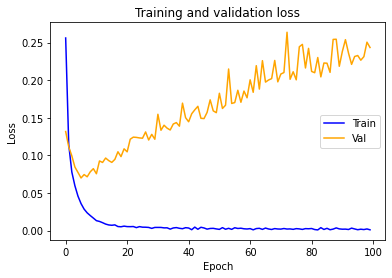

In [15]:
model_deep = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model_deep.summary())

model_deep.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_deep.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_deep.predict(x_test), axis=1)))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4316 - accuracy: 0.8788 - val_loss: 0.1510 - val_accuracy: 0.9556
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1215 - accuracy: 0.9641 - val_loss: 0.0925 - val_accuracy: 0.9715
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.077

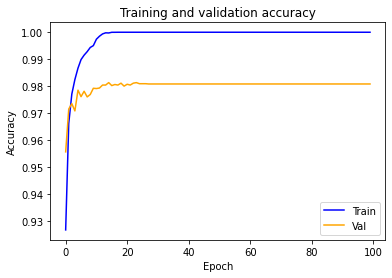

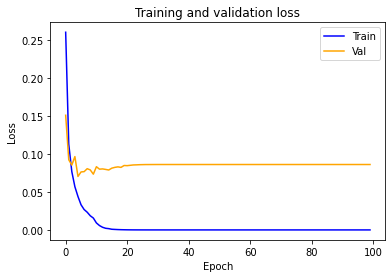

In [16]:
# with learning rate scheduler
model_deep = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model_deep.summary())

model_deep.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def scheduler(epoch, lr):
    return lr * (0.8**(epoch//10))

history = model_deep.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_deep.predict(x_test), axis=1)))


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3115 - accuracy: 0.9054 - val_loss: 0.0965 - val_accuracy: 0.9701
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0756 - accuracy: 0.9774 - val_loss: 0.0803 - val_accuracy: 0.9747
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.047

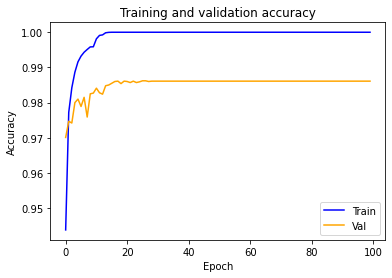

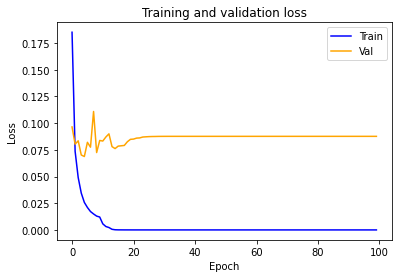

In [17]:
# wider with learning rate scheduler
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model3.summary())

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def scheduler(epoch, lr):
    return lr * (0.8**(epoch//10))

history = model3.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model3.predict(x_test), axis=1)))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2948 - accuracy: 0.9105 - val_loss: 0.0898 - val_accuracy: 0.9704
Epoch 2/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0724 - accuracy: 0.9776 - val_loss: 0.0784 - val_accuracy: 0.9738
Epoch 3/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.04

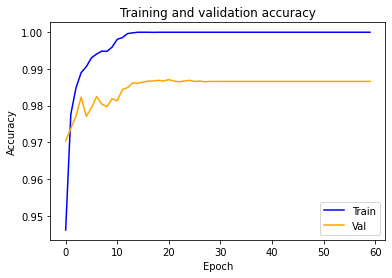

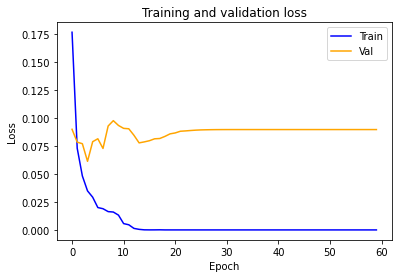

In [18]:
# wider with learning rate scheduler
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model3.summary())

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def scheduler(epoch, lr):
    return lr * (0.8**(epoch//10))

history = model3.fit(x_train, y_train, epochs=60, validation_data=(x_test, y_test), callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model3.predict(x_test), axis=1)))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 5120)              4019200   
_________________________________________________________________
dense_19 (Dense)             (None, 10)                51210     
Total params: 4,070,410
Trainable params: 4,070,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/60
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2823 - accuracy: 0.9133 - val_loss: 0.0816 - val_accuracy: 0.9747
Epoch 2/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0777 - accuracy: 0.9747 - val_loss: 0.0721 - val_accuracy: 0.9770
Epoch 3/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.04

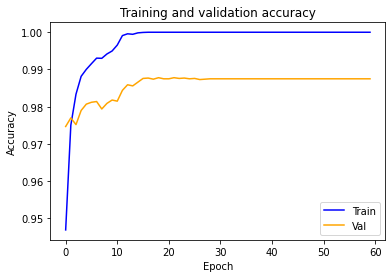

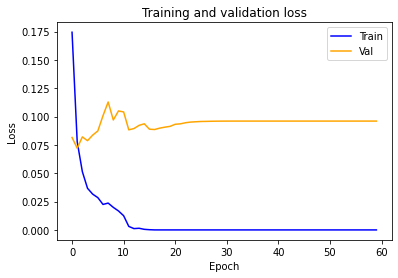

In [19]:
# wider with learning rate scheduler
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(5120, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model3.summary())

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def scheduler(epoch, lr):
    return lr * (0.8**(epoch//10))

history = model3.fit(x_train, y_train, epochs=60, validation_data=(x_test, y_test), callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model3.predict(x_test), axis=1)))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10240)             8038400   
_________________________________________________________________
dense_21 (Dense)             (None, 10)                102410    
Total params: 8,140,810
Trainable params: 8,140,810
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2812 - accuracy: 0.9133 - val_loss: 0.1227 - val_accuracy: 0.9645
Epoch 2/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0785 - accuracy: 0.9760 - val_loss: 0.0995 - val_accuracy: 0.9692
Epoch 3/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.05

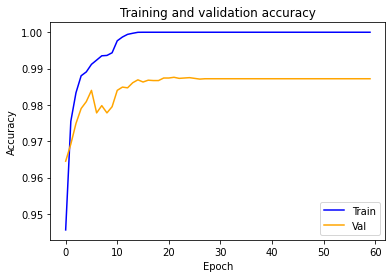

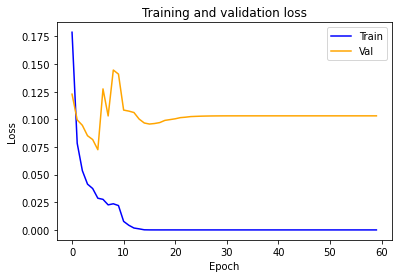

In [20]:
# wider with learning rate scheduler
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10240, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model3.summary())

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def scheduler(epoch, lr):
    return lr * (0.8**(epoch//10))

history = model3.fit(x_train, y_train, epochs=60, validation_data=(x_test, y_test), callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model3.predict(x_test), axis=1)))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10240)             8038400   
_________________________________________________________________
dense_23 (Dense)             (None, 10)                102410    
Total params: 8,140,810
Trainable params: 8,140,810
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2863 - accuracy: 0.9117 - val_loss: 0.1009 - val_accuracy: 0.9694
Epoch 2/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0783 - accuracy: 0.9765 - val_loss: 0.0966 - val_accuracy: 0.9711
Epoch 3/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.05

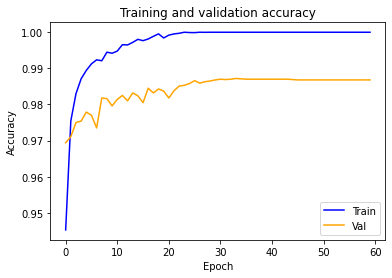

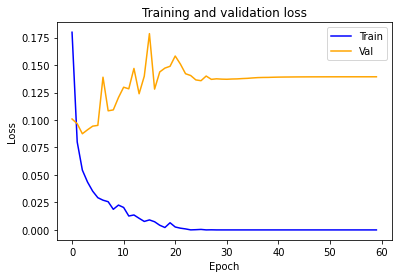

In [21]:
# wider with gentler learning rate scheduler
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10240, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model3.summary())

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def scheduler(epoch, lr):
    return lr * (0.95**(epoch//10))

history = model3.fit(x_train, y_train, epochs=60, validation_data=(x_test, y_test), callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model3.predict(x_test), axis=1)))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10240)             8038400   
_________________________________________________________________
dense_25 (Dense)             (None, 10)                102410    
Total params: 8,140,810
Trainable params: 8,140,810
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2872 - accuracy: 0.9120 - val_loss: 0.1339 - val_accuracy: 0.9581
Epoch 2/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0791 - accuracy: 0.9754 - val_loss: 0.0760 - val_accuracy: 0.9759
Epoch 3/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.04

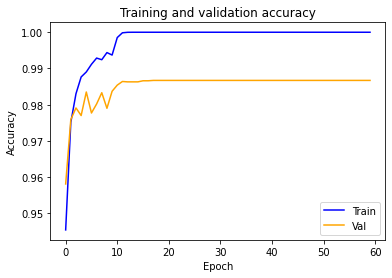

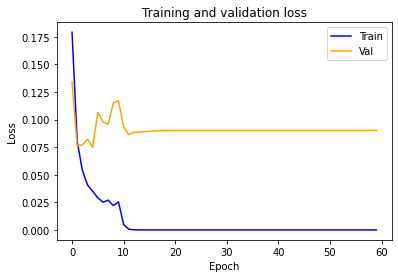

In [22]:
# wider with stricter learning rate scheduler
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10240, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model3.summary())

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def scheduler(epoch, lr):
    return lr * (0.5**(epoch//10))

history = model3.fit(x_train, y_train, epochs=60, validation_data=(x_test, y_test), callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model3.predict(x_test), axis=1)))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 102400)            80384000  
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1024010   
Total params: 81,408,010
Trainable params: 81,408,010
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/60
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3416 - accuracy: 0.9023 - val_loss: 0.1074 - val_accuracy: 0.9696
Epoch 2/60
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0927 - accuracy: 0.9725 - val_loss: 0.1062 - val_accuracy: 0.9720
Epoch 3/60
1875/1875 [==============================] - 34s 18ms/step - lo

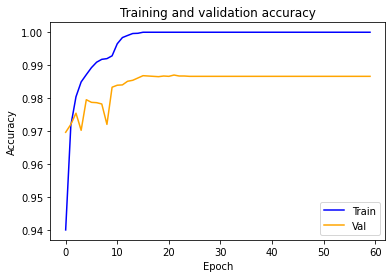

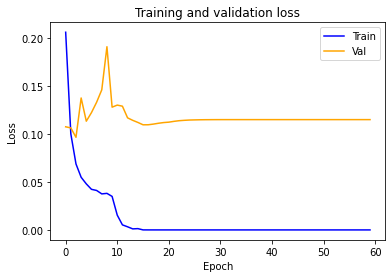

In [23]:
# much wider with learning rate scheduler
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(102400, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model3.summary())

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def scheduler(epoch, lr):
    return lr * (0.8**(epoch//10))

history = model3.fit(x_train, y_train, epochs=60, validation_data=(x_test, y_test), callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model3.predict(x_test), axis=1)))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 202400)            158884000 
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2024010   
Total params: 160,908,010
Trainable params: 160,908,010
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1875/1875 [==============================] - 156s 82ms/step - loss: 0.3992 - accuracy: 0.9009 - val_loss: 0.1185 - val_accuracy: 0.9642
Epoch 2/30
1875/1875 [==============================] - 153s 82ms/step - loss: 0.0972 - accuracy: 0.9730 - val_loss: 0.1104 - val_accuracy: 0.9703
Epoch 3/30
1875/1875 [==============================] - 155s 83ms/step 

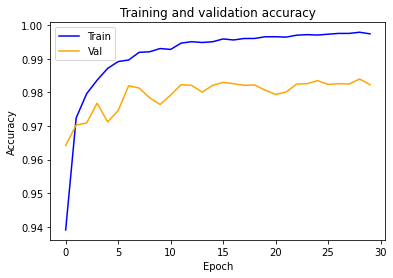

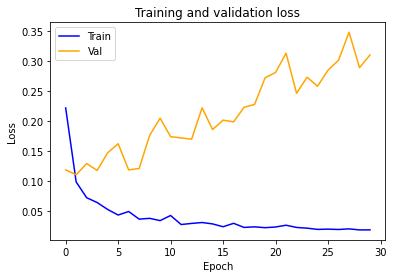

In [7]:
# much much wider with no learning rate scheduler
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(202400, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model3.summary())

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def scheduler(epoch, lr):
    return lr * (0.8**(epoch//10))

history = model3.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model3.predict(x_test), axis=1)))

In [5]:
# much much wider with learning rate scheduler
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(202400, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model3.summary())

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def scheduler(epoch, lr):
    return lr * (0.98**epoch)

history = model3.fit(x_train, y_train, epochs=60, validation_data=(x_test, y_test), callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model3.predict(x_test), axis=1)))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 202400)            158884000 
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2024010   
Total params: 160,908,010
Trainable params: 160,908,010
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/60
1875/1875 [==============================] - 35s 17ms/step - loss: 0.4015 - accuracy: 0.8999 - val_loss: 0.1174 - val_accuracy: 0.9665
Epoch 2/60
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0947 - accuracy: 0.9714 - val_loss: 0.0962 - val_accuracy: 0.9742
Epoch 3/60
1875/1875 [==============================] - 32s 17ms/step - los

NameError: ignored

Epoch 1/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4089 - accuracy: 0.8779 - val_loss: 0.1294 - val_accuracy: 0.9594
Epoch 2/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1044 - accuracy: 0.9686 - val_loss: 0.1017 - val_accuracy: 0.9694
Epoch 3/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0693 - accuracy: 0.9779 - val_loss: 0.1182 - val_accuracy: 0.9647
Epoch 4/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0530 - accuracy: 0.9837 - val_loss: 0.0868 - val_accuracy: 0.9731
Epoch 5/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0393 - accuracy: 0.9879 - val_loss: 0.0915 - val_accuracy: 0.9740
Epoch 6/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0371 - accuracy: 0.9884 - val_loss: 0.1134 - val_accuracy: 0.9723
Epoch 7/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0308 - accuracy: 0.9895 - val_loss: 0.0867 - val_accuracy:

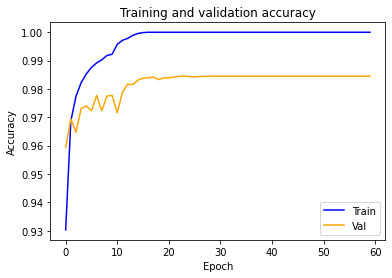

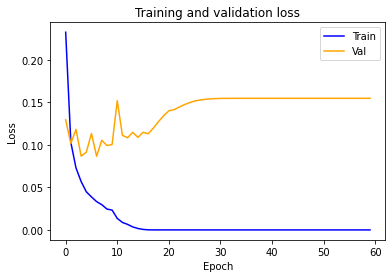

In [25]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def scheduler(epoch, lr):
    return lr * (0.8**(epoch//10))

history = model3.fit(x_train, y_train, epochs=60, validation_data=(x_test, y_test), callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model3.predict(x_test), axis=1)))